In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime,timedelta
from countryinfo import CountryInfo # we can get the information anout country from this (population, coordinates, etc)


import sklearn.metrics as sklm
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

In [2]:
# getting data from John Hopkins observatory is providing a github repository with all recent data: 
# https://github.com/CSSEGISandData/COVID-19.git

In [3]:
giturl_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_data = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'


In [4]:
covid_id='Confirmed'

In [5]:
if covid_id=='Confirmed':
    curl = giturl_confirmed
elif covid_id =='Deaths':
    curl = giturl_deaths
elif covid_id =='Recovered':
    curl = giturl_recovered

In [6]:
corona_cases_df = pd.read_csv(curl)  #   use first four columns as multiindex

In [7]:
print(corona_cases_df.shape)
print(corona_cases_df.columns.values)


(245, 68)
['Province/State' 'Country/Region' 'Lat' 'Long' '1/22/20' '1/23/20'
 '1/24/20' '1/25/20' '1/26/20' '1/27/20' '1/28/20' '1/29/20' '1/30/20'
 '1/31/20' '2/1/20' '2/2/20' '2/3/20' '2/4/20' '2/5/20' '2/6/20' '2/7/20'
 '2/8/20' '2/9/20' '2/10/20' '2/11/20' '2/12/20' '2/13/20' '2/14/20'
 '2/15/20' '2/16/20' '2/17/20' '2/18/20' '2/19/20' '2/20/20' '2/21/20'
 '2/22/20' '2/23/20' '2/24/20' '2/25/20' '2/26/20' '2/27/20' '2/28/20'
 '2/29/20' '3/1/20' '3/2/20' '3/3/20' '3/4/20' '3/5/20' '3/6/20' '3/7/20'
 '3/8/20' '3/9/20' '3/10/20' '3/11/20' '3/12/20' '3/13/20' '3/14/20'
 '3/15/20' '3/16/20' '3/17/20' '3/18/20' '3/19/20' '3/20/20' '3/21/20'
 '3/22/20' '3/23/20' '3/24/20' '3/25/20']


In [8]:
def countries_list():
    # note returning countries list in confirmes cases only
    curl = confirmed_data
    corona_cases_df = pd.read_csv(curl, index_col=[0,1,2,3])
    country_list = np.unique(corona_cases_df['Country/Region'].values)
    return(country_list)

In [9]:
curl = giturl_confirmed
corona_cases_df = pd.read_csv(curl)

In [10]:
corona_cases_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20'],
      dtype='object')

In [11]:
corona_cases_df = pd.read_csv(curl, index_col=[0,1,2,3])  #   use first four columns as multiindex
#corona_cases_df.columns.values[4:]

In [12]:
#countries = ['China', 'Canada', 'India']
datesformat = [datetime.strptime(da, '%m/%d/%y') for da in corona_cases_df.columns.values[4:]]
daterange = pd.DatetimeIndex(datesformat)

In [72]:
print(daterange)

DatetimeIndex(['2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
               '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
      

In [13]:
country_official_list = (corona_cases_df.index.get_level_values('Country/Region').values)
print(country_official_list)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Central African Republic' 'Chad'
 'Chile' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Denmark' 'Denmark' 'Dj

In [14]:
wanted_countries = ['Canada', 'India','China', 'US']

country_list = (corona_cases_df.index.get_level_values('Country/Region').values)
countries_list = [np.unique(np.array([s for s in country_list if cou in s])) for cou in wanted_countries]
countries_list = np.array(countries_list).flatten()
print((countries_list))

['Canada' 'India' 'China' 'US']


In [15]:
country_list = (corona_cases_df.index.get_level_values('Country/Region').values)


In [16]:
'''for cou in wanted_countries:
    for s in country_list:
        if cou in s:
            print(cou)'''

'for cou in wanted_countries:\n    for s in country_list:\n        if cou in s:\n            print(cou)'

In [17]:
countries_list[0]

'Canada'

In [37]:
# getting all for canada
corona_cases_df.loc[pd.IndexSlice[:, 'China'], :]

,,,,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20
Province/State,Country/Region,Lat,Long,,,,,,,,,,,,,,,,,,,,,
Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,...,990,990,990,990,990,990,990,990,990,990
Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,...,452,456,469,480,491,504,522,537,558,561
Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,...,576,576,576,576,576,576,577,578,578,578
Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,...,296,296,296,296,299,303,313,313,318,322
Gansu,China,37.8099,101.0583,0,2,2,4,7,14,19,24,26,29,...,133,133,133,134,134,134,136,136,136,136
Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,...,1361,1364,1370,1378,1395,1400,1413,1415,1428,1433
Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,...,252,253,253,253,254,254,254,254,254,254
Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,...,146,147,146,146,146,146,146,146,146,146
Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,...,168,168,168,168,168,168,168,168,168,168


In [19]:
print('                                              INDEX SLICE (EXAMPLE)')
midx = pd.MultiIndex.from_product([['A0','A1'], ['B0','B1','B2','B3']])
columns = ['foo', 'bar']
dfmi = pd.DataFrame(np.arange(16).reshape((len(midx), len(columns))),
                        index=midx, columns=columns)
print('raw data')
print(dfmi)

idx = pd.IndexSlice
print('')
print('Example of Index slice')
print(dfmi.loc[idx[:, 'B0':'B1'], :])

                                              INDEX SLICE (EXAMPLE)
raw data
       foo  bar
A0 B0    0    1
   B1    2    3
   B2    4    5
   B3    6    7
A1 B0    8    9
   B1   10   11
   B2   12   13
   B3   14   15

Example of Index slice
       foo  bar
A0 B0    0    1
   B1    2    3
A1 B0    8    9
   B1   10   11


In [20]:
cases_percountry = {}
df_dict = {}
for country in countries_list:
    
    # CHECK THE INDEX SLICE EXAMPLE ABOVE. WE ARE DOIGN THIS TO GET ALL THE DATA FOR THE COUNTRY WE ARE LOOKING FOR
    # we are doing sum for the total number of cases in a country, eg: in canada we have 12 rows for wach province
    # but we want to see for whole canada
    cou = corona_cases_df.loc[pd.IndexSlice[:, country], :].sum()
    
    # getting rid of the record which has zero cases
    cases_percountry[country] = cou[cou > 0]
    datesformat = [datetime.strptime(da, '%m/%d/%y') for da in cases_percountry[country].index]
    df_dict[country] = pd.DataFrame(cases_percountry[country], columns=['Cases'], index=datesformat)
    df_dict[country]['DayCount'] = np.arange(1,cases_percountry[country].shape[0]+1)
#df_dict has country -> date, cases: # cases that day, DayCount

In [21]:
# there is asome manual fix of data followed online.. some numbers were not correct
# copied from the link mentioned above

confirmed_fixes_dict = {'Italy|2020-03-12': 15113,
                        'Spain|2020-03-12': 3146,
                        'France|2020-03-12': 2876,
                        'United Kingdom|2020-03-12': 590,
                        'Germany|2020-03-12': 2745,
                        'Argentina|2020-03-12': 19,
                        'Australia|2020-03-12': 122,
                        'Belgium|2020-03-12': 314,
                        'Chile|2020-03-12': 23,
                        'Colombia|2020-03-12': 9,
                        'Greece|2020-03-12': 98,
                        'Indonesia|2020-03-12': 34,
                        'Ireland|2020-03-12': 43,
                        'Japan|2020-03-12': 620,
                        'Netherlands|2020-03-12': 503,
                        'Qatar|2020-03-12': 262,
                        'Singapore|2020-03-12': 178,
                        'France|2020-03-15': 5423,}
                        
deaths_fixes_dict = {'Italy|2020-03-12': 1016,
                     'Spain|2020-03-12': 86,
                     'France|2020-03-12': 61,
                     'United Kingdom|2020-03-12': 10,
                     'Germany|2020-03-12': 6,
                     'Argentina|2020-03-12': 1,
                     'Australia|2020-03-12': 3,
                     'Greece|2020-03-12': 1,
                     'Indonesia|2020-03-12': 1,
                     'Ireland|2020-03-12': 1,
                     'Japan|2020-03-12': 15,
                     'Netherlands|2020-03-12': 5,
                     'Switzerland|2020-03-12': 4,
                     'United Kingdom|2020-03-15': 35,
                     'France|2020-03-15': 127}
                     
recovered_fixes_dict = {'Italy|2020-03-12': 1258,
                        'Spain|2020-03-12': 189,
                        'France|2020-03-12': 12,
                        'Germany|2020-03-12': 25}

In [22]:
country_list = (corona_cases_df.index.get_level_values('Country/Region').values)
print(country_list)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Australia'
 'Australia' 'Australia' 'Australia' 'Australia' 'Australia' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada' 'Canada'
 'Canada' 'Canada' 'Canada' 'Canada' 'Central African Republic' 'Chad'
 'Chile' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'China'
 'China' 'China' 'China' 'China' 'China' 'China' 'China' 'Colombia'
 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Diamond Princess' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Denmark' 'Denmark' 'Dj

In [23]:
print(covid_id)
if covid_id=='Confirmed':
    fixes_dict = confirmed_fixes_dict
    print(fixes_dict)
    
elif covid_id =='Deaths':
    fixes_dict = deaths_fixes_dict

elif covid_id =='Recovered':
    fixes_dict = recovered_fixes_dict   

# fixing the confirmed cases
for key in fixes_dict.keys():
        country_to_be_fixed = key.split('|')[0]
        if country_to_be_fixed in df_dict.keys():
            date_to_be_fixed = key.split('|')[1]
            value_to_be_fixed = fixes_dict[key]
            df_dict[country_to_be_fixed]['Cases'].loc[date_to_be_fixed] = value_to_be_fixed

Confirmed
{'Italy|2020-03-12': 15113, 'Spain|2020-03-12': 3146, 'France|2020-03-12': 2876, 'United Kingdom|2020-03-12': 590, 'Germany|2020-03-12': 2745, 'Argentina|2020-03-12': 19, 'Australia|2020-03-12': 122, 'Belgium|2020-03-12': 314, 'Chile|2020-03-12': 23, 'Colombia|2020-03-12': 9, 'Greece|2020-03-12': 98, 'Indonesia|2020-03-12': 34, 'Ireland|2020-03-12': 43, 'Japan|2020-03-12': 620, 'Netherlands|2020-03-12': 503, 'Qatar|2020-03-12': 262, 'Singapore|2020-03-12': 178, 'France|2020-03-15': 5423}


In [24]:
#print(df_dict.keys())
#print(df_dict)
print(df_dict.Index())
#print(df_dict['Canada']['Cases'].values)

AttributeError: 'dict' object has no attribute 'Index'

In [25]:
countries_list

array(['Canada', 'India', 'China', 'US'], dtype='<U6')

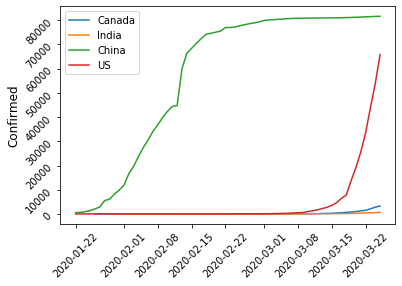

In [26]:
for country in countries_list:
    dates_count = df_dict[country].index.values
    plt.plot(dates_count, np.array(df_dict[country].Cases.values), label = country)
    plt.legend()
    plt.tick_params(rotation= 45)
    plt.ylabel(covid_id, fontsize = 12)

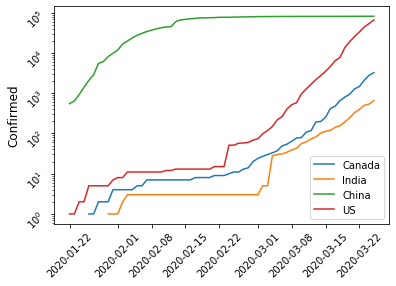

In [27]:

for country in countries_list:    
    dates_count = df_dict[country].index.values
    plt.semilogy(dates_count, np.array(df_dict[country].Cases.values), label = country)
    plt.legend()
    plt.tick_params(rotation= 45)
    plt.ylabel(covid_id, fontsize = 12)
    

In [28]:
# the models that I will be working on
# Logistic: https://en.wikipedia.org/wiki/Logistic_function
# gomperts = https://en.wikipedia.org/wiki/Gompertz_function
# exponential function


In [29]:
def mod_logistic(x,l,k,x_0):
    return l/(1+np.exp(-k*(x-x_0)))

def mod_gompertz(x,a,b,c):
    return(a*np.exp(-b*np.exp(-c*x))) 

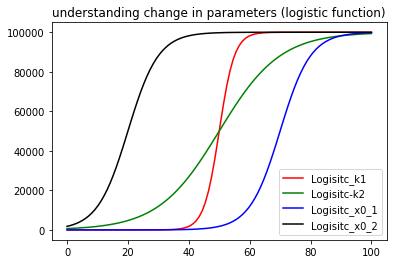

In [30]:
# leaning more about logistic function
# how to control parameters
tt= np.linspace(0,100,100)

plt.title('understanding change in parameters (logistic function)')
plt.plot(tt, mod_logistic(tt,100000,0.4,50), c='r', label='Logisitc_k1')
plt.plot(tt, mod_logistic(tt,100000,0.1,50), c='g', label='Logisitc-k2')
plt.plot(tt, mod_logistic(tt,100000,0.2,70), c='b', label='Logisitc_x0_1')
plt.plot(tt, mod_logistic(tt,100000,0.2,20), c='k', label='Logisitc_x0_2')
plt.legend()


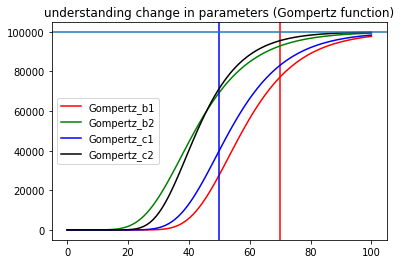

In [31]:
plt.title('understanding change in parameters (Gompertz function)')
plt.plot(tt, mod_gompertz(tt, 100000, 70, 0.08), c='r', label='Gompertz_b1')
plt.axvline(x=70, c='r')
plt.plot(tt, mod_gompertz(tt, 100000, 20, 0.08), c='g', label='Gompertz_b2')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 0.08), c='b', label='Gompertz_c1')
plt.axvline(x=50, c='b')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 0.1), c='k', label='Gompertz_c2')
plt.legend()

plt.axhline(y=100000)

(-1000, 150000)

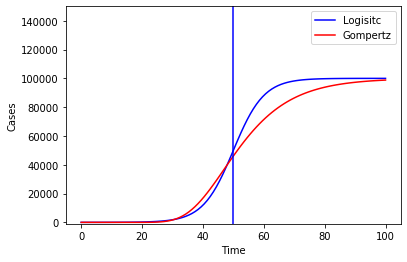

In [39]:
plt.plot(tt, mod_logistic(tt,100000,0.2,50), c='b', label='Logisitc')
plt.plot(tt, mod_gompertz(tt, 100000, 50, 1/12), c='r', label='Gompertz')
plt.legend()
plt.axvline(x=50, c='b')
plt.xlabel('Time')
plt.ylabel('Cases')
plt.ylim(-1000,150000)

In [33]:
country = 'China'
c_pars = {}

x = np.array(list(df_dict[country]['DayCount'].values))[0:-1] 
y = np.array(list(df_dict[country]['Cases'].values))[0:-1] 
fit_i = curve_fit(mod_logistic,x,y,p0=[50000,0.33,50], maxfev=10000)#, bounds=([0,0,0],[10,100,150000]))
li,ki,x_0i = fit_i[0]
sigma_li, sigma_ki, sigma_x_0i = np.sqrt(np.diag(fit_i[1]))

c_pars[(country,'Logistic','l')] = li
c_pars[(country,'Logistic','k')] = ki
c_pars[(country,'Logistic','a')] = x_0i


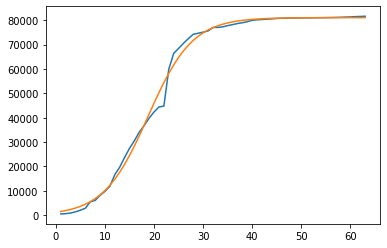

In [38]:
plt.plot(x,y)
dd = fit_i[0]
plt.plot(x, mod_logistic(x,dd[0],dd[1],dd[2]))


In [35]:
colr = ['r','g','b','k']
for i in range(len(fit_i)):
    dd = fit_i[i]
    print(i)
    plt.plot(x, mod_logistic(x,fit_i[0]), c=colr[i])
    #print(mod_logistic(x,dd[0],dd[1],dd[2]))

0


TypeError: mod_logistic() missing 2 required positional arguments: 'k' and 'x_0'

In [36]:
np.array(list(df_dict[country]['DayCount'].values))[1:-2] 

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62])